Libraries

In [73]:
import os
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.metrics import accuracy_score

image loading

In [74]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img = cv2.imread(os.path.join(folder, filename),cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = img.flatten() #1-dimention
                images.append(img)
                label = int(filename.split('_')[0])  
                labels.append(label)
    return np.array(images), np.array(labels)



در این بخش داده های عکس دیتاست را به داده های یک بعدی به کمک فلتن تبدیل کردم . جزییات کد برای تطابق داشتنش با نوع فایل های داده شده در دیتاست است

load dataset- train and test

In [75]:
def load_dataset(group):
    train_images, train_labels = load_images_from_folder(f'dataset/{group}/train')
    test_images, test_labels = load_images_from_folder(f'dataset/{group}/test')
    return train_images, train_labels, test_images, test_labels

در این بخش داده های را به تست و ترین تقسیم بندی کرده ایم و انها را به همراه لیبل ها به عنوان  خروجی تابع برگردانده ایم

Image display

In [76]:
def show(images, rows, columns):
    counter = 1
    fig = plt.figure(figsize=(60, 60))
    for img in images:
        two_d = []
        for i in range(59):
            two_d.append(img[i * 60:(i + 1) * 60])
        fig.add_subplot(rows, columns, counter)
        counter += 1
        plt.imshow(two_d, cmap=plt.get_cmap('gray'))
    plt.show()

.این تابع برای نمایش دادن عکس هاست که له کمک ایمیج و سطر و ستون عکس را چاپ میکند
در انتهای کد برای گرفتن خروجی ها از این تابع استفاده میکنیم

Prototype

In [77]:
def compute_prototypes(train_images, train_labels, new_size=(60, 60)):
    classes = np.unique(train_labels)
    prototypes = {}
    for clas in classes:
        class_images = train_images[train_labels == clas]
        resized_images = [cv2.resize(image.reshape(60, 60), new_size) for image in class_images]
        mean_image = np.mean(resized_images, axis=0).flatten()
        prototypes[clas] = mean_image
    return prototypes

تابعی برای محاسبه نمونه‌های اولیه هر کلاس تعریف کرده ایم. این تابع میانگین تصاویر هر کلاس را محاسبه کرده و نمونه اولیه را نمایش می‌دهد. این نمونه‌ها نمایانگر ویژگی‌های کلی هر کلاس هستند و به عنوان نماینده‌ای از هر کلاس در فضای ویژگی‌ها استفاده میشوند.

Distance 

In [78]:
def euclidean_distance(sample1, sample2):
    temp = 0
    for i in range (len(sample1)):
        temp+=  (sample1[i] - sample2[i]) ** 2
    return temp

این تابع برای محاسبه فاصله اقلیدسی است که در ادامه از آن استفاده میکنیم

MDC

In [79]:
def MDC(test_images, prototypes):
    predictions = []
    for image in test_images:
        distances = {cls: euclidean_distance(image, prototype) for cls, prototype in prototypes.items()}
        predicted = min(distances, key=distances.get)
        predictions.append(predicted)
    return np.array(predictions)

این تابع بر اساس مینیمم فاصله که ما آنرا اقلیدسی تعریف کردیم، روی داده ها پیش بینی انجام میدهد

Evaluation

In [80]:
def evaluate(group_of_images):
    train_images, train_labels, test_images, test_labels = load_dataset(group_of_images)
    prototypes = compute_prototypes(train_images, train_labels)
    
    
    num_prototypes = len(prototypes)
    rows = math.ceil(math.sqrt(num_prototypes))
    cols = math.ceil(num_prototypes / rows)
    show(prototypes.values(), rows, cols)
    
    predictions = []
    for image in test_images:
        distances = {}
        for cls, prototype in prototypes.items():
            distances[cls] = euclidean_distance(image, prototype)
        predicted_class = min(distances, key=distances.get)
        predictions.append(predicted_class)
        
    accuracy =accuracy_score(test_labels, predictions)
    print(f'accuracy score for : {group_of_images}: {accuracy * 100:.2f}%')

در این بخش به کمک تابع فاصله و تابع نمایش عکس که بالاتر انها را توضیح دادیم ، پس از محاسبه دقت مدل ، عکسها چاپ و دفت بدست آمده زیر آنها نوشته میشود

Grouping

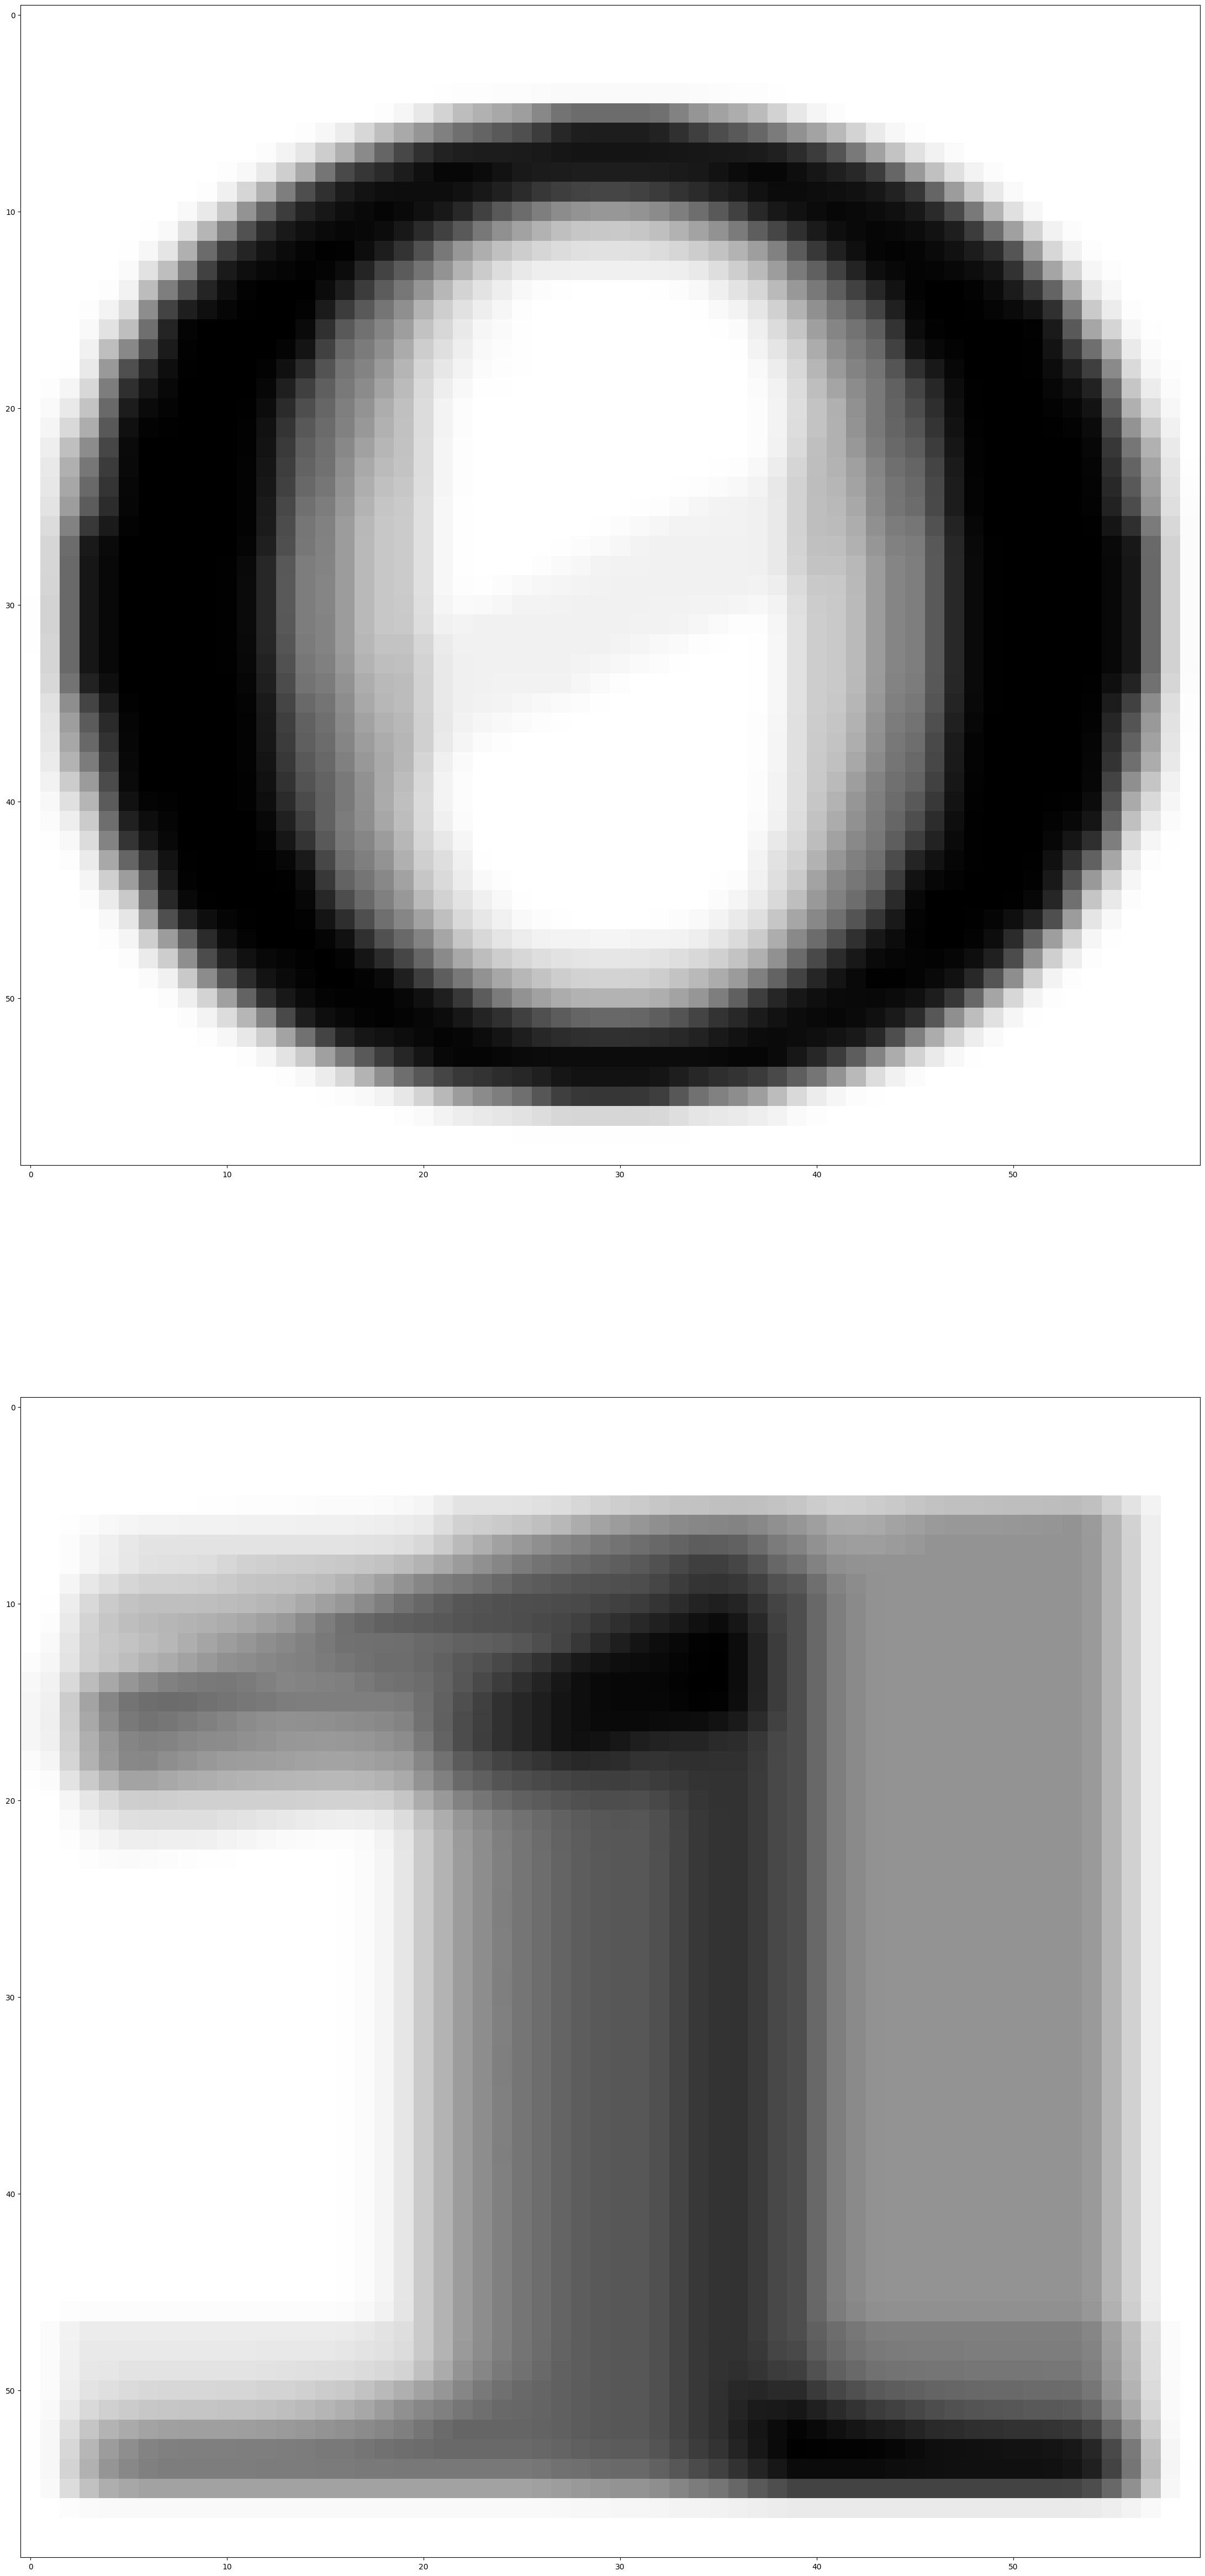

accuracy score for : a: 100.00%


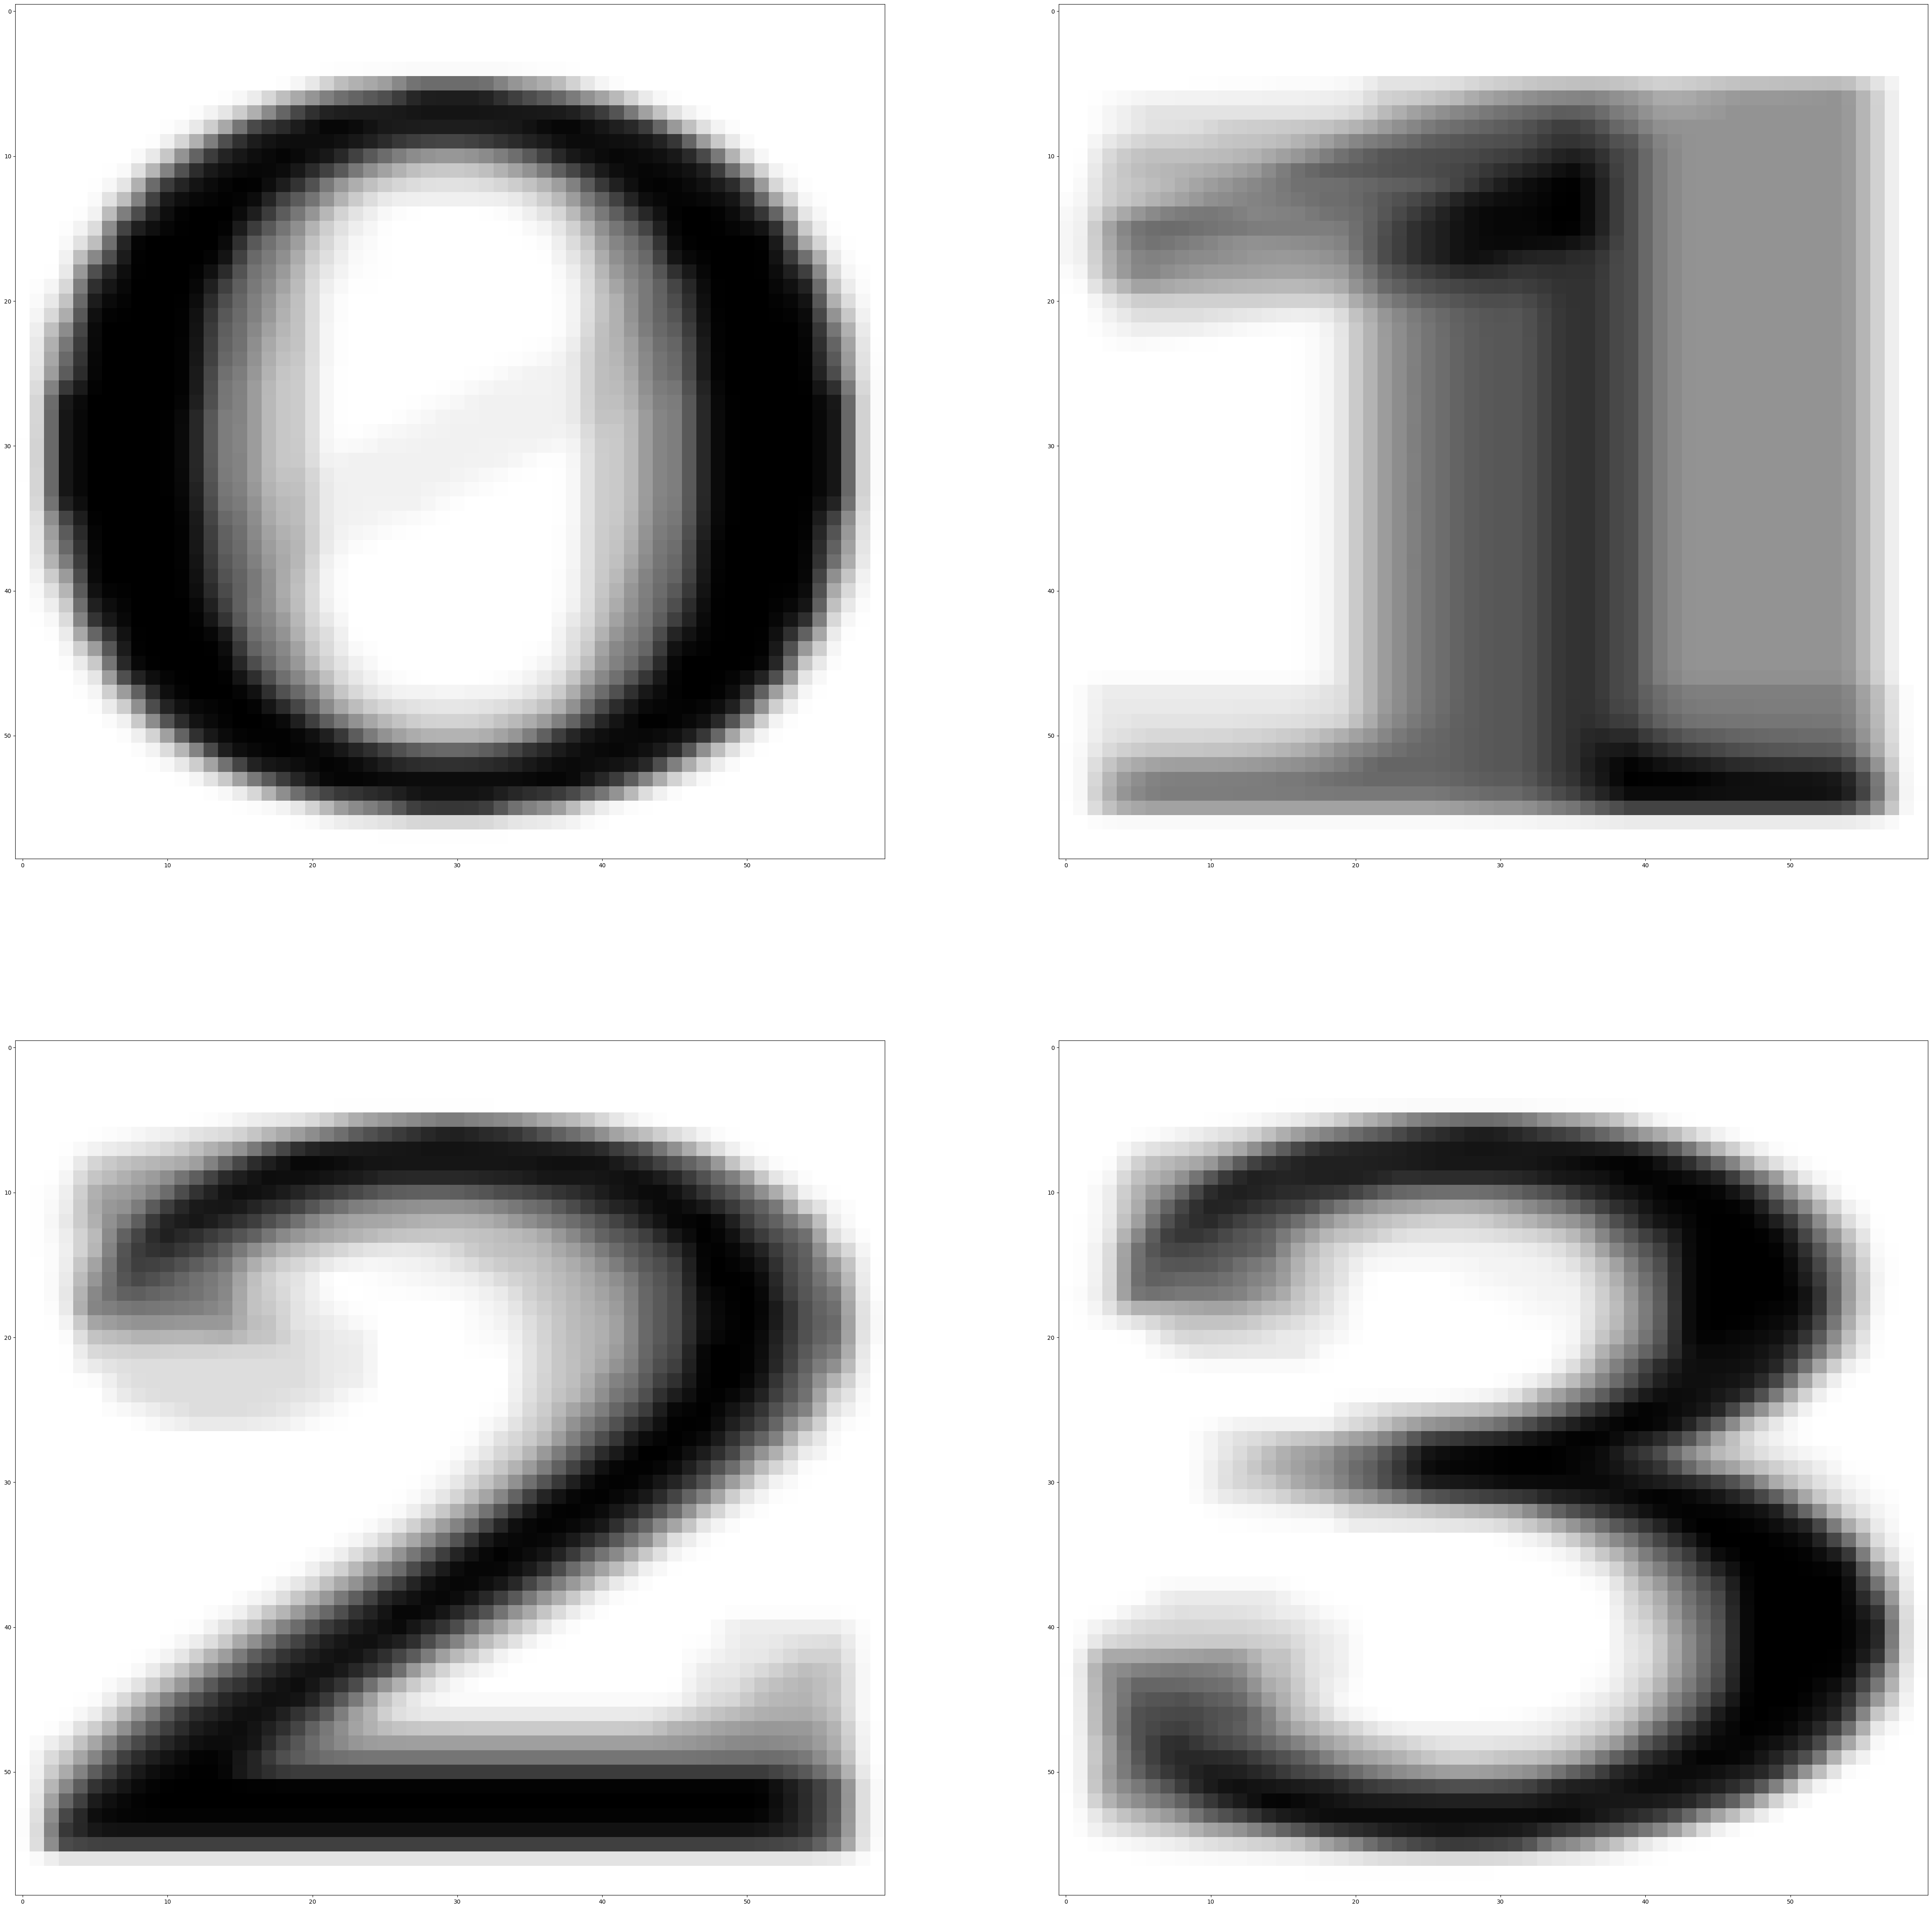

accuracy score for : b: 100.00%


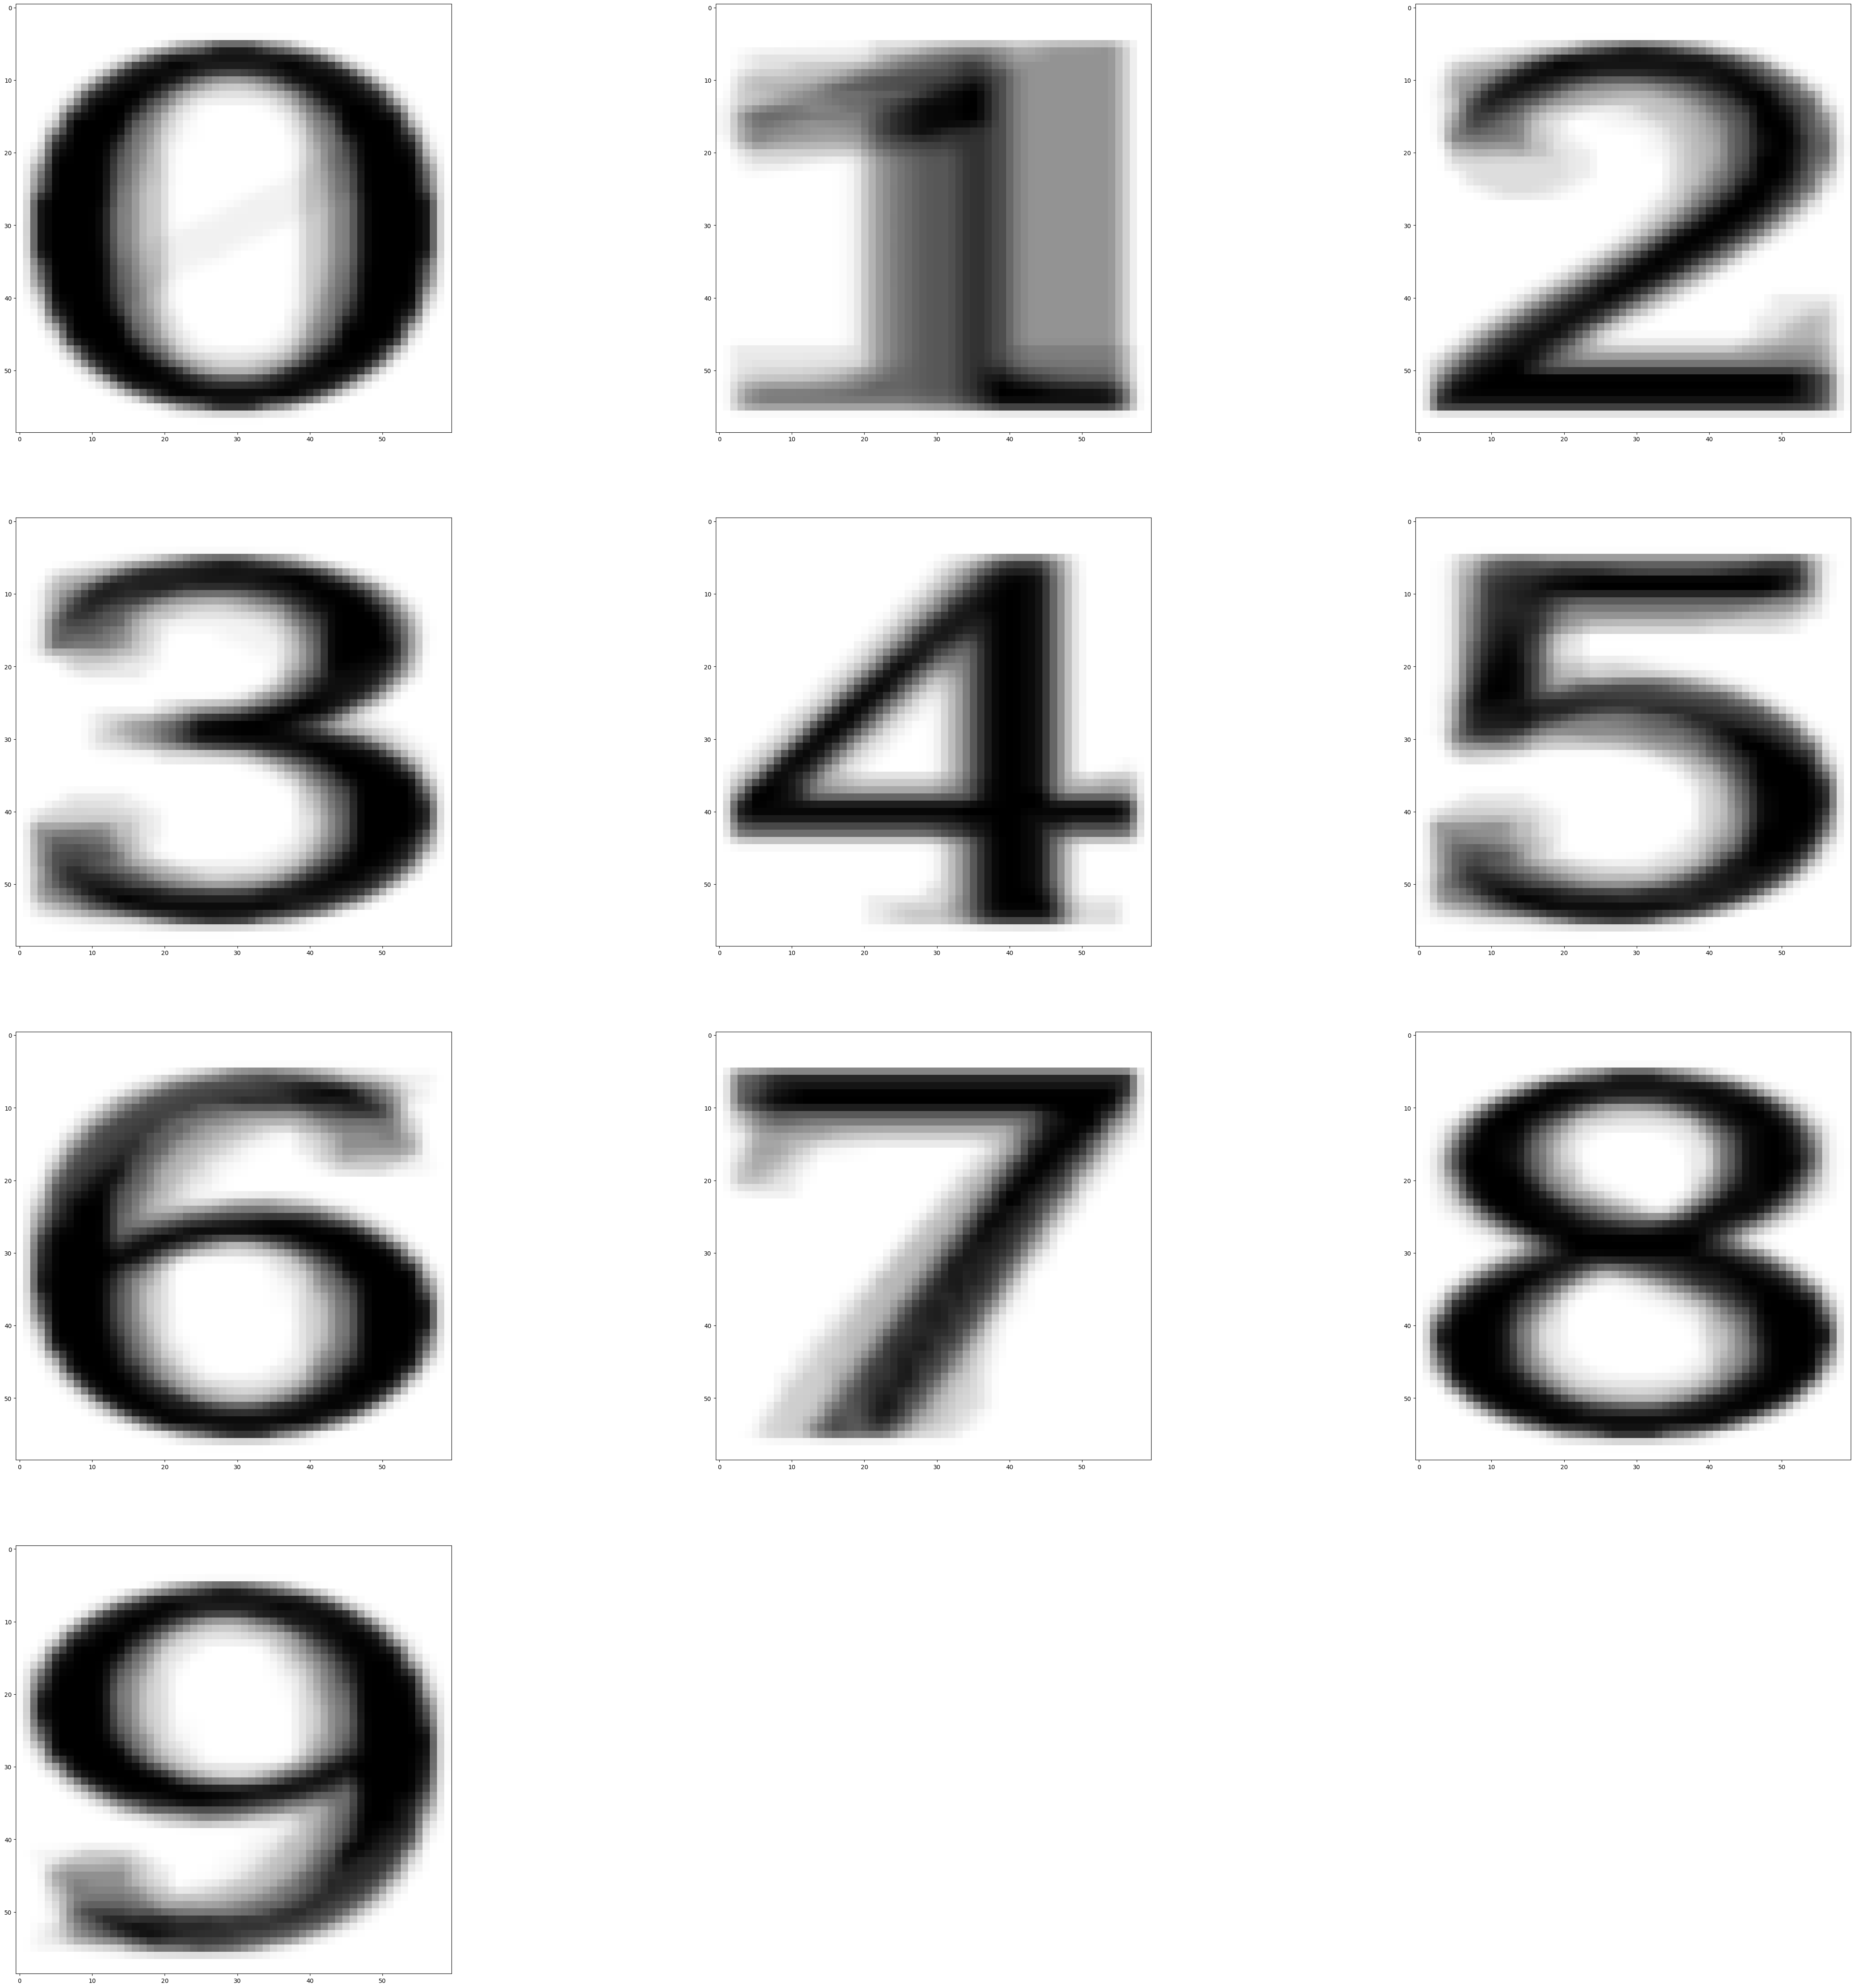

accuracy score for : c: 99.00%


In [81]:
for group_of_images in ['a', 'b', 'c']:
    evaluate(group_of_images)

دقت های خواسته شده در سوال اخر زیر هر گروه نوشته شده